In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [95]:
# downloading the data
from sklearn import datasets
boston=datasets.load_boston()

In [96]:
#creating dataframe
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)
dataset['Price']= boston.target

In [97]:
# calculated the stats
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [98]:
# Finding the outliers 
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
Price        7.975000
dtype: float64


C:\Users\chaitvaidya\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


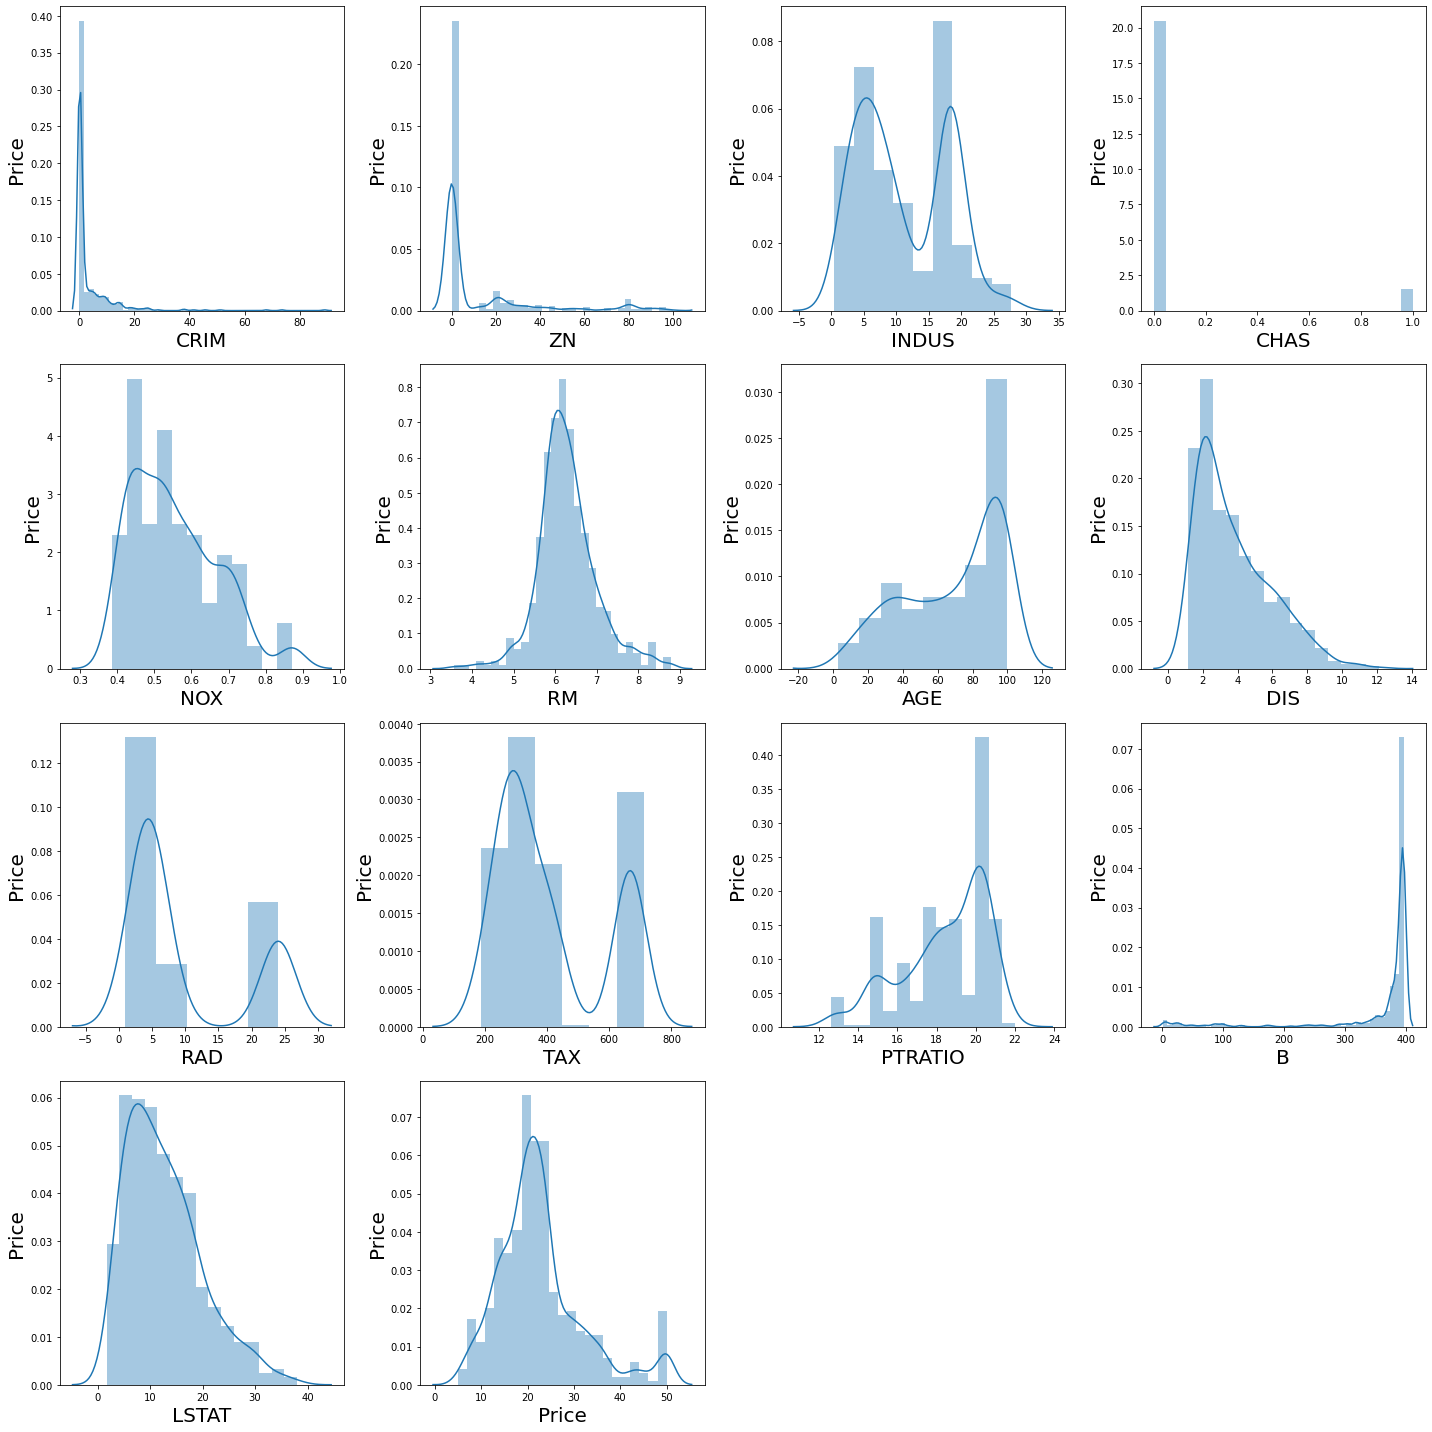

In [99]:
# Vizulize the data is distributed for every column
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [100]:
X = dataset.drop(columns = ['Price'])
y = dataset['Price']

In [101]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),('classifer', RandomForestRegressor())])
grid_param=[
    {"classifer":[RandomForestRegressor()],
      "classifer__n_estimators":[10,20,40,60,80,100],
     "classifer__criterion":['mse','mae'],
     "classifer__max_depth":range(2,20,1),
     "classifer__min_samples_split":range(2,20,1)}]
grid_search = GridSearchCV(pipe,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [103]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'classifer': RandomForestRegressor(max_depth=13, min_samples_split=4, n_estimators=60),
 'classifer__criterion': 'mse',
 'classifer__max_depth': 13,
 'classifer__min_samples_split': 4,
 'classifer__n_estimators': 60}

In [105]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifer', RandomForestRegressor(criterion='mse',max_depth=13,min_samples_split=4,n_estimators=60))])
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifer',
                 RandomForestRegressor(max_depth=13, min_samples_split=4,
                                       n_estimators=60))])

In [107]:
pipe.score(x_train, y_train), pipe.score(x_test, y_test)

(0.9701356824921564, 0.8590430485524947)

In [110]:
y_pred = pipe.predict(x_test)

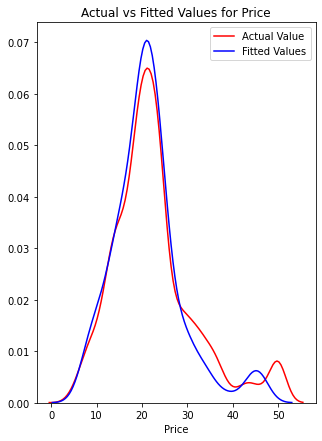

In [111]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()